In [2]:
# Import NumPy for numerical operations
import numpy as np

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.optim as optim

# Import the time module to time our training process
import time

# Import a utility module for additional plotting functions
import utils_plots

# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")

In [44]:
import torch
from torch.nn import Parameter

def polynomial(c, x):
    """Polinomio con coeficientes c y variable x"""
    return (-c[0]*x**2 + c[0]*x - 2*c[0] - c[1]*x**3 + c[1]*x**2 - 6*c[1]*x + 2*c[1] - c[2]*x**4 + c[2]*x**3 - 12*c[2]*x**2 + 6*c[2]*x - c[3]*x**5 + c[3]*x**4 - 20*c[3]*x**3 + 12*c[3]*x**2 + x) 

def polynomial(c, x):
    """Polinomio con coeficientes c y variable x"""
    terms = [c[i] * x**(i+1) * (1 - x) for i in range(len(c))]
    return sum(terms)

c = Parameter(torch.ones(4)) 

x = torch.linspace(0, 1, steps=100)  # Crea un tensor con 100 puntos equidistantes entre 0 y 1
target_value = torch.tensor(0.0)  # Example target value

def loss_fn(x, c, target):
    y = polynomial(c, x)
    loss = torch.mean((y - target) ** 2)  # Mean squared error
    return loss

optimizer = torch.optim.Adam([c], lr=0.01)

for epoch in range(10_000):  # Number of iterations
    optimizer.zero_grad()  # Clear previous gradients
    loss = loss_fn(x, c, target_value)  # Compute loss
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    if epoch % 1000 == 0:  # Print progress every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss}, c: {c.data}')

print(f'Optimized c: {c.data}')

Epoch 0, Loss: 0.1371428519487381, c: tensor([0.9900, 0.9900, 0.9900, 0.9900])
Epoch 1000, Loss: 7.483451716569263e-18, c: tensor([-7.1209e-08,  2.1958e-07, -1.3896e-08, -2.0098e-07])
Epoch 2000, Loss: 4.138324220418081e-18, c: tensor([-5.1093e-08,  1.7343e-07, -3.0501e-08, -1.5217e-07])
Epoch 3000, Loss: 1.5798729905601958e-18, c: tensor([-3.2956e-08,  1.1798e-07, -4.2679e-08, -7.8401e-08])
Epoch 4000, Loss: 3.1015548073042635e-19, c: tensor([-1.6570e-08,  6.7786e-08, -5.3369e-08, -1.2018e-08])
Epoch 5000, Loss: 2.4398616283092138e-20, c: tensor([-6.9118e-09,  3.8012e-08, -5.8959e-08,  2.6503e-08])
Epoch 6000, Loss: 4.774938860053566e-21, c: tensor([-3.8869e-09,  2.8304e-08, -5.9263e-08,  3.7325e-08])
Epoch 7000, Loss: 4.164734426859803e-21, c: tensor([-3.4027e-09,  2.6069e-08, -5.6747e-08,  3.6854e-08])
Epoch 8000, Loss: 3.564898831891363e-21, c: tensor([-3.1416e-09,  2.4099e-08, -5.2504e-08,  3.4122e-08])
Epoch 9000, Loss: 2.758111775729462e-21, c: tensor([-2.7631e-09,  2.1196e-08, 

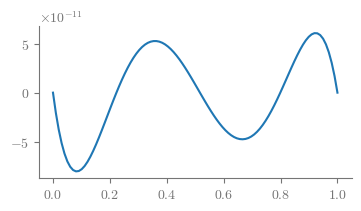

In [45]:
def funcion_aprox(x, c):
    """Función de aproximación con coeficientes c y variable x"""
    terms = [coef * x**(i + 1) * (1 - x) for i, coef in enumerate(c)]
    return np.sum(terms, axis=0)

y = funcion_aprox(x, c.detach().numpy())

# Create a figure for the plot
fig = plt.figure(figsize=(3.5, 2.0))
plt.plot(x,y)